# Linear Regression

We will implement a linear regression model by using the Keras library. 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data set: Weight and height

Active Drive and read the csv file with the weight and height data

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning-Intro-part2/weight-height.csv')

In [0]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


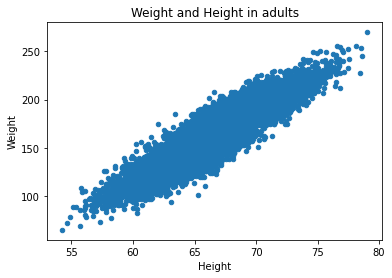

In [0]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

## Model building


In [0]:
# Import the type of model: Sequential, because we will add elements to this model in a sequence
from keras.models import Sequential
# To build a linear model we will need only dense layers
from keras.layers import Dense
# Import the optimizers, they change the weights and biases looking for the minimum cost
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


### Define the model

In [0]:
# define the model to be sequential
model = Sequential()

```
Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

Just your regular densely-connected NN layer.

Dense implements the operation: $output = activation(dot(input, kernel) + bias)$ where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

In [0]:
# we add to the model a dense layer
# the first parammeter is the number of units that is how many outputs this layer will have 
# Since this is a linear regression we will require a model with one output and one input
model.add(Dense(1, input_shape=(1,))) #this code implements a model x*w+b

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We have a single layer called 'dense_1' the Output Shape is 1 number and it has 2 parameters. 
The reason that the Output Shape is (None, 1) is because the model can accept multiple points at once, instead of passing a single value we can ask for many values of x in one single call.


When we compile the model, Keras will construct the model based on the backend software that we define (here we are using TensorFlow model).



```
model.compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)
```


In [0]:
# we will compile using the cost function (loss) 'mean_squared_error'
model.compile(Adam(lr=0.8), 'mean_squared_error')

### Fit the model

In [0]:
X = df[['Height']].values      #input data
y_true = df['Weight'].values   #output data

Fit the model by using the input data, X, and the output data, y_true. In each iteration the loss is decreasing by looking for the W and B values. In this example it will search 40 times (40 epochs).

In [0]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 54us/step - loss: 641.6255
Epoch 2/40
10000/10000 [==============================] - 0s 26us/step - loss: 531.2374
Epoch 3/40
10000/10000 [==============================] - 0s 27us/step - loss: 475.7274
Epoch 4/40
10000/10000 [==============================] - 0s 26us/step - loss: 437.8883
Epoch 5/40
10000/10000 [==============================] - 0s 27us/step - loss: 378.0077
Epoch 6/40
10000/10000 [==============================] - 0s 29us/step - loss: 348.8181
Epoch 7/40
10000/10000 [==============================] - 0s 25us/step - loss: 298.8625
Epoch 8/40
10000/10000 [==============================] - 0s 25us/step - loss: 285.9285
Epoch 9/40
10000/10000 [==============================] - 0s 25us/step - loss: 267.1154
Epoch 10/40
10000/10000 [==============================] - 0s 27us/step - loss: 257.0898
Epoch 11/40
10000/10000 [==============================] - 0s 26us/step - loss: 229.6472
Epoch 12/40
10000/10000 [=====

In [0]:
y_pred = model.predict(X)

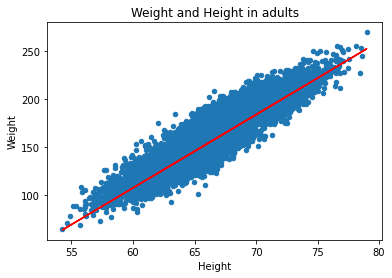

In [0]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

Extract the values of W (slope) and B (bias). 


In [0]:
W, B = model.get_weights()

In [0]:
W

array([[7.4930134]], dtype=float32)

In [0]:
B

array([-348.76944], dtype=float32)

## Performance of the model 


In [0]:
from sklearn.metrics import r2_score

In [0]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.829


### Train/test split


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [0]:
len(X_train)

8000

In [0]:
len(X_test)

2000

In [0]:
#reset the parameters of the model
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [0]:
#retrain the model in the selected sample
model.fit(X_train, y_train, epochs=50, verbose=0) #verbose=0 doesn't show each iteration

In [0]:
y_train_pred = model.predict(X_train).ravel() 
y_test_pred = model.predict(X_test).ravel()

In [0]:
from sklearn.metrics import mean_squared_error as mse

In [0]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	169.0
The Mean Squared Error on the Test set is:	176.4


In [0]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.837
The R2 score on the Test set is:	0.827


The score for the training set is close to the one in the test set, therefore this model is good in generalization. 
